In [1]:
import pyNN.spiNNaker as sim
import pyNN.utility.plotting as plot
import matplotlib.pyplot as plt


Detected PyNN version 0.9.4 and Neo version 0.6.1


## Setting up the simulator:

In [2]:
sim.setup(timestep=1.0)
sim.set_number_of_neurons_per_core(sim.IF_curr_exp, 100)

2019-05-17 14:43:14 INFO: Read cfg files: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg, /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg, /home/jovyan/.spynnaker.cfg
2019-05-17 14:43:14 INFO: Will search these locations for binaries: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/common_model_binaries : /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/model_binaries
2019-05-17 14:43:14 INFO: Setting time scale factor to 1.0.
2019-05-17 14:43:14 INFO: Setting machine time step to 1000 micro-seconds.


['/home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg', '/home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg', '/home/jovyan/.spynnaker.cfg']


## Setting up the populations:

In [3]:
# Define Input neuron
# input = sim.Population(1,sim.SpikeSourceArray(spike_times=[10, 200,210,215, 217, 220, 225, 325, 456]),label="input")
#input = sim.Population(1,sim.SpikeSourceArray(spike_times=[2]),label="input")
#input = sim.Population(1, sim.SpikeSourcePoisson(rate=0), label="Input")
input = sim.Population(1, sim.SpikeSourcePoisson(), label="Input")

# Define output neuron
pop_1 = sim.Population(1,sim.IF_curr_exp(),label="pop_1")

# Connect Input Neuron with Output neuron
input_proj=sim.Projection(input,pop_1,sim.OneToOneConnector(),synapse_type=sim.StaticSynapse(weight=5,delay=1))

pop_1.record(["spikes","v"])
input.record(["spikes"])

## Simulate:

In [4]:
simtime = 100000
sim.run(simtime)

2019-05-17 14:43:14 INFO: Simulating for 100 1000ms timesteps using a hardware timestep of 1000000us
2019-05-17 14:43:14 INFO: Starting execution process
2019-05-17 14:43:19 INFO: Time 0:00:03.805564 taken by SpallocMaxMachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2019-05-17 14:43:30 INFO: Time 0:00:11.003133 taken by PreAllocateResourcesForExtraMonitorSupport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2019-05-17 14:43:38 INFO: Time 0:00:07.176802 taken by PartitionAndPlacePartitioner
Created spalloc job 4642696
2019-05-17 14:43:38 INFO: Created spalloc job 4642696
Waiting for board power commands to complete.
2019-05-17 14:43:38 INFO: Waiting for board power commands to complete.
2019-05-17 14:43:45 INFO: Time 0:00:07.106387 taken by SpallocAllocator
2019-05-

Loading Tags
|0%                          50%                         100%|
2019-05-17 14:43:57 INFO: Time 0:00:00.023939 taken by TagsLoader
Writing data
|0%                          50%                         100%|
2019-05-17 14:43:57 INFO: Time 0:00:00.033258 taken by WriteMemoryIOData
Executing data specifications and loading data
|0%                          50%                         100%|
2019-05-17 14:43:57 INFO: Time 0:00:00.154519 taken by HostExecuteDataSpecification
Expanding Synapses
|0%                          50%                         100%|
2019-05-17 14:43:57 INFO: Time 0:00:00.552959 taken by SynapseExpander
Writing fixed route report
|0%                          50%                         100%|
2019-05-17 14:43:57 INFO: Time 0:00:00.047399 taken by FixedRouteFromMachineReport
Loading executables onto the machine
|0%                          50%                         100%|
2019-05-17 14:43:59 INFO: Time 0:00:01.444672 taken by LoadExecutableImages
Reading Routi

100000.0

## Print:

In [5]:
# Input neuron
neo_input=input.get_data(variables=["spikes"])

spikes_input=neo_input.segments[0].spiketrains
print(spikes_input)
print( len(spikes_input[0]) )

# Pop1 neuron
neo_pop1=pop_1.get_data(variables=["spikes","v"])

v_pop1=neo_pop1.segments[0].filter(name='v')[0]
#print(v_pop1)

spikes_pop1=neo_pop1.segments[0].spiketrains
#print(spikes_pop1)

sim.end()

Getting spikes for Input
|0%                          50%                         100%|
Getting spikes for pop_1
|0%                          50%                         100%|
Getting v for pop_1
|0%                          50%                         100%|


[<SpikeTrain(array([ 1471.,  2134.,  2532.,  3733.,  3938.,  5460.,  5753.,  6003.,
        6126.,  6535.,  6667.,  7044.,  7472.,  7514.,  8183.,  8622.,
        9138.,  9881., 12714., 13489., 13977., 14790., 14973., 15237.,
       16285., 17208., 18295., 18697., 18734., 18737., 19338., 20178.,
       20844., 21466., 22108., 22671., 22717., 23362., 25278., 28496.,
       32401., 34675., 35875., 37075., 37248., 37258., 37798., 38690.,
       40132., 41277., 42415., 43370., 44990., 45004., 45687., 46704.,
       47218., 49253., 49439., 49486., 49515., 49700., 49902., 52430.,
       54979., 56634., 57441., 58284., 58788., 60175., 61330., 62057.,
       64182., 69088., 69475., 71912., 72181., 72265., 73093., 73178.,
       73360., 73446., 74289., 75029., 77147., 77241., 77392., 77673.,
       78004., 78652., 79516., 80155., 80910., 80992., 85877., 86225.,
       86753., 86892., 88736., 89055., 89668., 89746., 93020., 94550.,
       94973., 95453., 95561., 96041., 96146., 96404., 97570.]) 

## Plot:

<IPython.core.display.Javascript object>


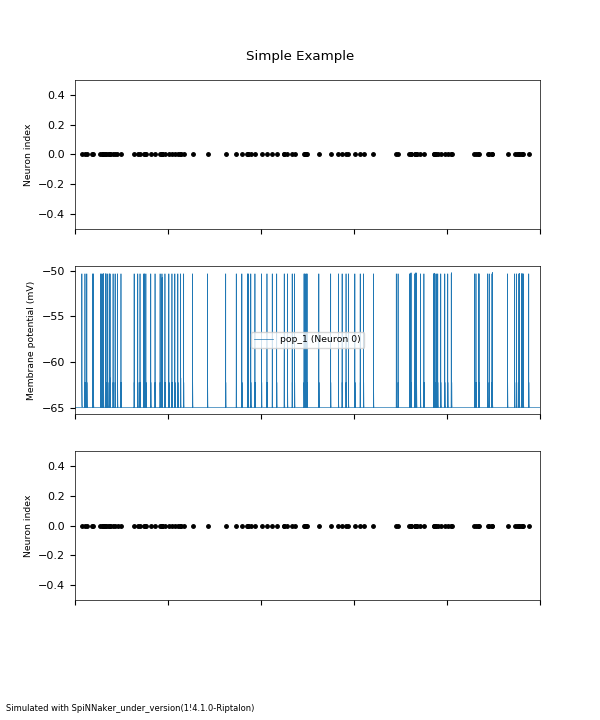

In [6]:
plot.Figure(
    #plot spikes for input population
    plot.Panel(spikes_input, yticks=True, markersize=5, xlim =(0, simtime)),
    
    #plot voltage for first ([0]) neuron
    plot.Panel(v_pop1, ylabel="Membrane potential (mV)", data_labels=[pop_1.label], yticks=True, xlim =(0, simtime)),
    
    #plot spikes for pop1 population
    plot.Panel(spikes_pop1, yticks=True, markersize=5, xlim =(0, simtime)),
    
    title="Simple Example",
    annotations="Simulated with {}".format(sim.name())
)
plt.show()